# Striplog basics

This notebooks looks at the main `striplog` object. For the basic objects it depends on, see [Basic objects](./Basic_objects.ipynb).

First, import anything we might need.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

import striplog
striplog.__version__

# If you get a lot of warnings here, try running this block again.

'0.8.2'

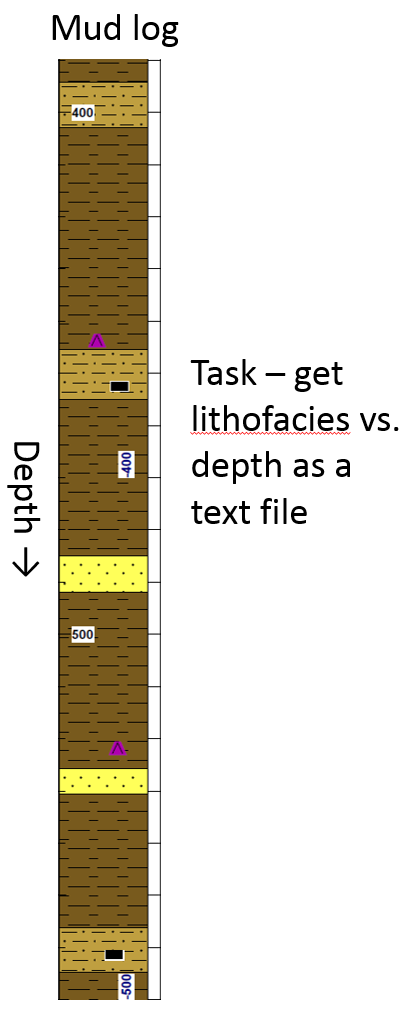

In [2]:
from IPython.display import Image
Image("mudlog.png", width=180)

## Make a legend

`Striplog`s are made of `Interval`s.

`Interval`s (usually) contain `Component`s. 

The `Legend` is the lookup table for the `Component`s we're going to place in the `Interval`s.

The colours just have to be close to the colours in the image.

In [3]:
from striplog import Legend

legend_csv = """comp lithology, colour, width
                mud, sienna, 1
                silt, darkkhaki, 2
                sand, yellow, 3"""

legend = Legend.from_csv(text=legend_csv)

In [4]:
legend

Legend(Decor({'_colour': '#a0522d', 'width': 1.0, 'component': Component({'lithology': 'mud'}), 'hatch': None})
Decor({'_colour': '#bdb76b', 'width': 2.0, 'component': Component({'lithology': 'silt'}), 'hatch': None})
Decor({'_colour': '#ffff00', 'width': 3.0, 'component': Component({'lithology': 'sand'}), 'hatch': None}))

## Making a `striplog`

In [5]:
from striplog import Striplog

In [6]:
strip = Striplog.from_img("mudlog.png",
                          start=200, stop=400,
                          col_offset=0.25,  # How far across the image to extract pixels
                          legend=legend,
                          tolerance=90,     # How forgiving to be on the colours
                          background='#ffffff',  # Ignore this colour
                         )

/home/matt/anaconda3/envs/welly/lib/python3.7/site-packages/striplog/striplog.py:867: UserWarning: from_img() is deprecated; please use from_image()
  warnings.warn(w)


In [7]:
strip

Striplog(57 Intervals, start=200.0, stop=400.0)

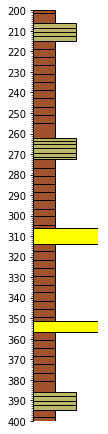

In [8]:
strip.plot(lw=1, legend=legend, aspect=4)

Because of the hatching in the origin image, there are a lot of intervals with identical components. We can merge them:

In [9]:
strip = strip.merge_neighbours()

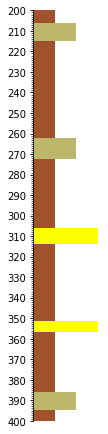

In [10]:
strip.plot(legend=legend, aspect=4)

In [11]:
strip.unique

[(Component({'lithology': 'mud'}), 159.14893617021278),
 (Component({'lithology': 'silt'}), 27.659574468085054),
 (Component({'lithology': 'sand'}), 13.191489361702168)]

It's easy enough to visualize this.

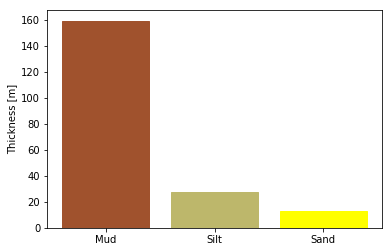

In [12]:
_ = strip.hist(legend=legend)

## Write CSV or LAS3

In [13]:
print(strip.to_csv())

Top,Base,Component
200.0,206.38297872340425,Mud
206.38297872340425,215.10638297872342,Silt
215.10638297872342,262.1276595744681,Mud
262.1276595744681,272.55319148936167,Silt
272.55319148936167,306.17021276595744,Mud
306.17021276595744,313.82978723404256,Sand
313.82978723404256,351.27659574468083,Mud
351.27659574468083,356.8085106382979,Sand
356.8085106382979,386.17021276595744,Mud
386.17021276595744,394.6808510638298,Silt
394.6808510638298,400.0,Mud



In [14]:
print(strip.to_las3())

~Lithology_Parameter
LITH .   Striplog         : Lithology source          {S}
LITHD.   MD               : Lithology depth reference {S}

~Lithology_Definition
LITHT.M                   : Lithology top depth       {F}
LITHB.M                   : Lithology base depth      {F}
LITHD.                    : Lithology description     {S}

~Lithology_Data | Lithology_Definition
200.0,206.38297872340425,Mud
206.38297872340425,215.10638297872342,Silt
215.10638297872342,262.1276595744681,Mud
262.1276595744681,272.55319148936167,Silt
272.55319148936167,306.17021276595744,Mud
306.17021276595744,313.82978723404256,Sand
313.82978723404256,351.27659574468083,Mud
351.27659574468083,356.8085106382979,Sand
356.8085106382979,386.17021276595744,Mud
386.17021276595744,394.6808510638298,Silt
394.6808510638298,400.0,Mud



<hr />

<p style="color:gray">©2019 Agile Geoscience. Licensed CC-BY. <a href="https://github.com/agile-geoscience/striplog">striplog.py</a></p>